## Simon's Algorithm Implementation in Qiskit

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

3


/Users/arshmalik/.pyenv/versions/3.11.6/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


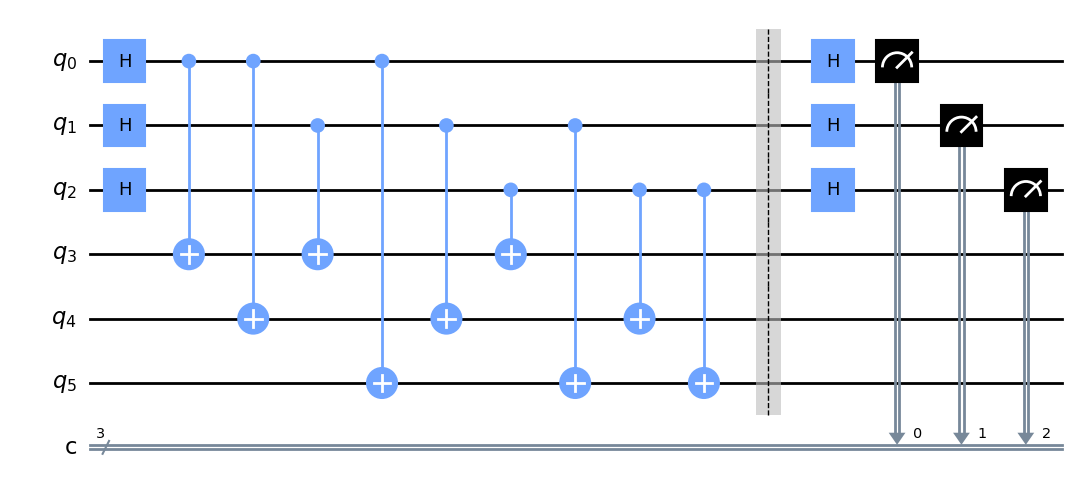

In [37]:
  
s = '111'  # Secret string
n = len(s) # Number of qubits
print(n)
# Create a quantum circuit with n input and n output qubits
qc = QuantumCircuit(2*n, n)

# Apply Hadamard gates to the input qubits
qc.h(range(n))

# Apply the oracle
# The oracle will flip the output qubits based on the input qubits and the secret string s
for i in range(n):
    if s[i] == '1':
        for j in range(n):
            qc.cx(i, n+j)

# Apply Hadamard gates again to the input qubits
qc.barrier()
qc.h(range(n))

# Measure the input qubits
qc.measure(range(n), range(n))

# Display the circuit
qc.draw(output='mpl')

Counts(ideal): {'000': 496, '111': 528}


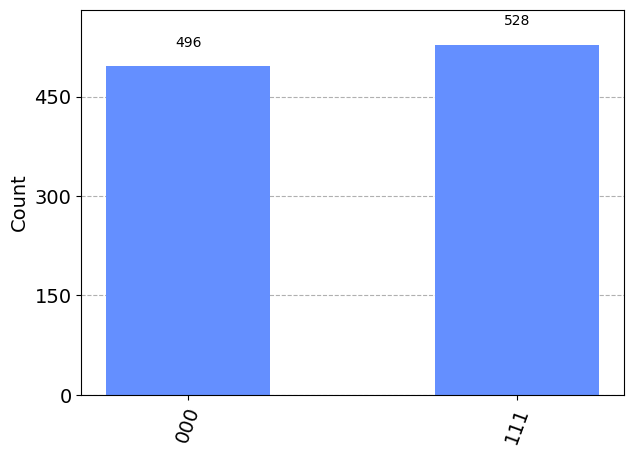

In [38]:
# Running the circuit
from qiskit_aer import AerSimulator

# we will use Aer's qasm_simulator
aersim = AerSimulator()

# get the results and the counts and plot a histogram
result_ideal = aersim.run(qc, shots = 1024).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

plot_histogram(counts_ideal)

Counts(noise): {'101': 7, '110': 72, '001': 75, '100': 24, '011': 21, '111': 389, '010': 16, '000': 420}


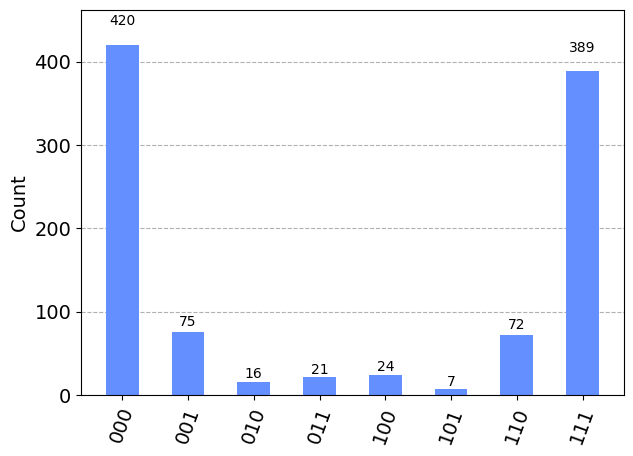

In [39]:
from qiskit.providers.fake_provider import FakeManilaV2

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)

# Perform noisy simulation
result_noise = aersim_backend.run(qc).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)

plot_histogram(counts_noise)

Text(0, 0.5, 'Execution Time')

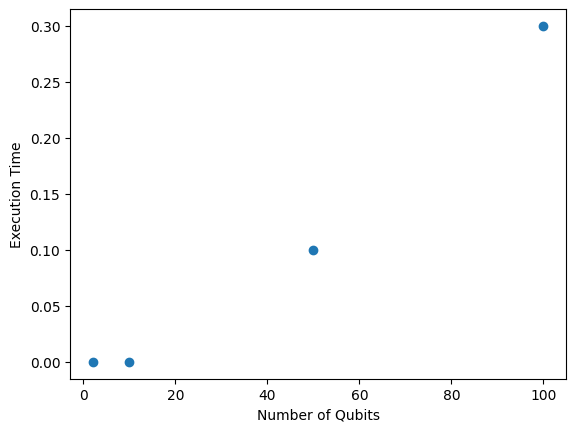

In [35]:
# plot for scalability of circuit

import matplotlib.pyplot as plt

num_qubits = [2, 10, 50, 100]
exec_time = [0.0, 0.0, 0.1, 0.3]

plt.scatter(num_qubits, exec_time)
plt.xlabel("Number of Qubits")
plt.ylabel("Execution Time")